I will be carrying out an explanatory analysis on Yelp Restaurants data set. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:

- What type of Restaurants get the most review?

- Which Restaurants receive higher rating?

- Which area receive the most rating and reviews?

- What borough of London has  the most expensive restaurants?

- Do expensive restaurants receive better rating?

In [1]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing clean data from Cleaning.ipng
data = pd.read_csv('data_clean.csv',index_col=0)

In [3]:
#lets look at the data set.
data.head()

,Business_ID,Bus_Name,Review_count,Rating,Category_Alias,Category_Title,Lat,Long,Price,Postcode
0,82I-SlGojUpp7Rzotmv9lg,&Pasta,5,3.5,delis,Delis,51.512861,-0.132078,2,W1D 6AW
1,zGSyCNHv2RKiEHRgVimVJg,&feast,1,2.0,buffets,Buffets,51.474195,-0.244208,0,SW13 9HH
2,ghg0SAC1cuKkk46ji-M9Kw,'The Black Lab' Coffee House,43,4.0,coffee,Coffee & Tea,51.461090,-0.138673,2,SW4 7AB
3,6hfGUw2-80sTXNvhijOtEQ,+65 / Plus-Six-Five Supper Club,1,5.0,singaporean,Singaporean,51.532459,-0.106200,0,N1
4,08H7ypKfwASXosKQcTT6RA,1 Blossom Street,1,3.0,italian,Italian,51.521059,-0.077761,2,E1 6BX


In [4]:
#double checking if there are any missing values
data.isnull().sum().sum()

0

## Business Review

Text(0, 0.5, 'Businesses')

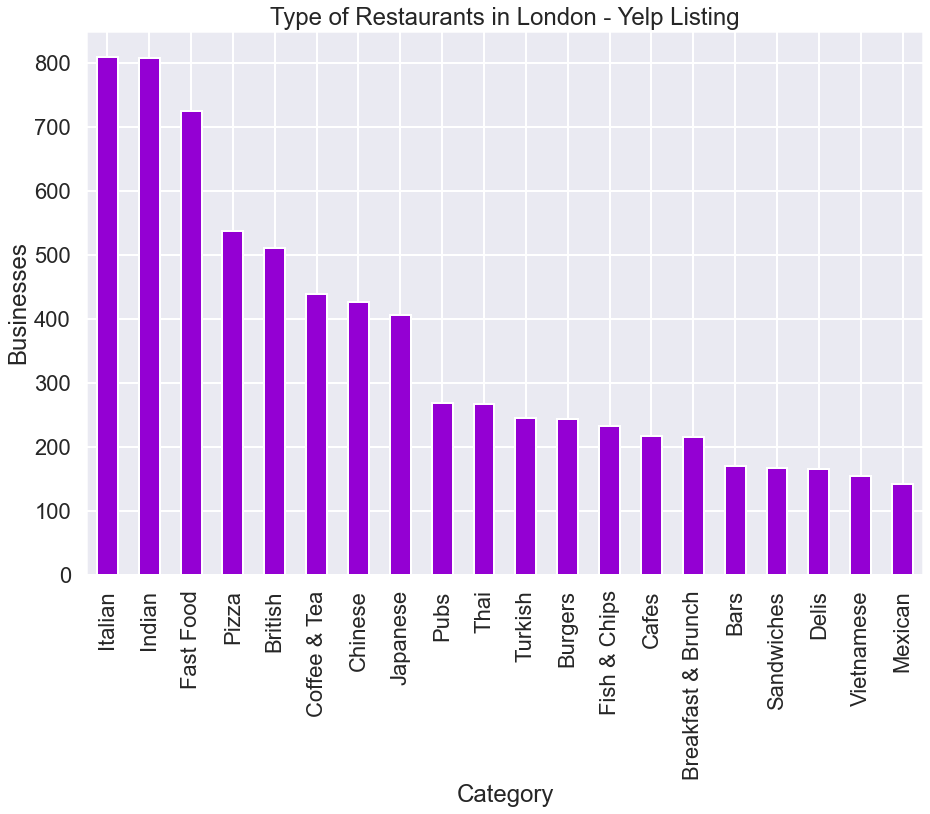

In [20]:
sns.set_context('poster')
sns.set_style('darkgrid')
data['Category_Title '].value_counts().nlargest(20).plot(kind='bar',figsize=(15,10),color='darkviolet')
listing = data['Category_Title '].value_counts()#.nlargest(20).plot(kind='bar',figsize=(15,10),color='darkviolet')
plt.title('Type of Restaurants in London - Yelp Listing')
plt.xlabel('Category')
plt.ylabel('Businesses')

There are 800+ Italian and Indian restaurants across London and there are 179  different categories of restaurants. London is known for its multi culture food in the UK and there are 29 different type of categories with more than 100 restaurants.

In [21]:
Review = data.groupby('Category_Title ')['Review_count '].sum()
Review_Per_Business = pd.concat([Review,listing],axis=1)

In [22]:
Review_Per_Business['Avg_Reviews'] = Review_Per_Business['Review_count '].div(Review_Per_Business['Category_Title '])

In [23]:
Review_Per_Business = Review_Per_Business[Review_Per_Business['Category_Title ']>100]
RR = Review_Per_Business.sort_values('Avg_Reviews',ascending=False)
R1 = RR.nlargest(20,'Avg_Reviews')

Text(0, 0.5, 'Avg Reviews Per Business')

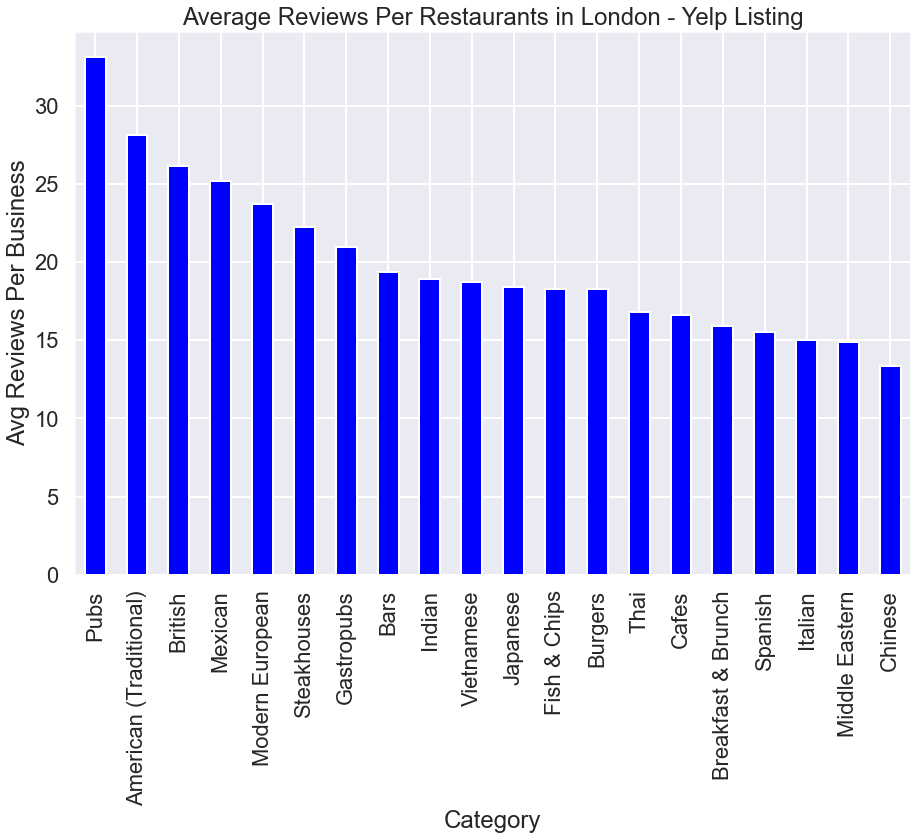

In [24]:
sns.set_context('poster')
sns.set_style('darkgrid')
R1.Avg_Reviews.plot(kind='bar',figsize=(15,10),color='b')
plt.title('Average Reviews Per Restaurants in London - Yelp Listing')
plt.xlabel('Category')
plt.ylabel('Avg Reviews Per Business')

Pubs and American Restaurants tend to get the most reviews. On Average each pub in London tend to get 30+ reviews.

# Business Rating 

In [25]:
Rating = data.groupby('Category_Title ')['Rating '].sum()
Rating_Per_Business = pd.concat([Rating,listing],axis=1)

In [26]:
Rating_Per_Business['Avg_Rating'] = Rating_Per_Business['Rating '].div(Rating_Per_Business['Category_Title '])

In [27]:
Rating_Per_Business = Rating_Per_Business[Rating_Per_Business['Category_Title ']>100]
RT = Rating_Per_Business.sort_values('Avg_Rating',ascending=False)
RT1 = RT.nlargest(20,'Avg_Rating')

In [28]:
RT

,Rating,Category_Title,Avg_Rating
Cafes,886.5,217,4.085253
Turkish,969.0,245,3.955102
Modern European,553.5,140,3.953571
Gastropubs,399.0,102,3.911765
Coffee & Tea,1702.5,439,3.878132
Middle Eastern,517.5,134,3.861940
Delis,640.5,166,3.858434
Mediterranean,544.0,141,3.858156
Italian,3106.0,810,3.834568
British,1948.0,511,3.812133


Text(0, 0.5, 'Avg Rating Per Business')

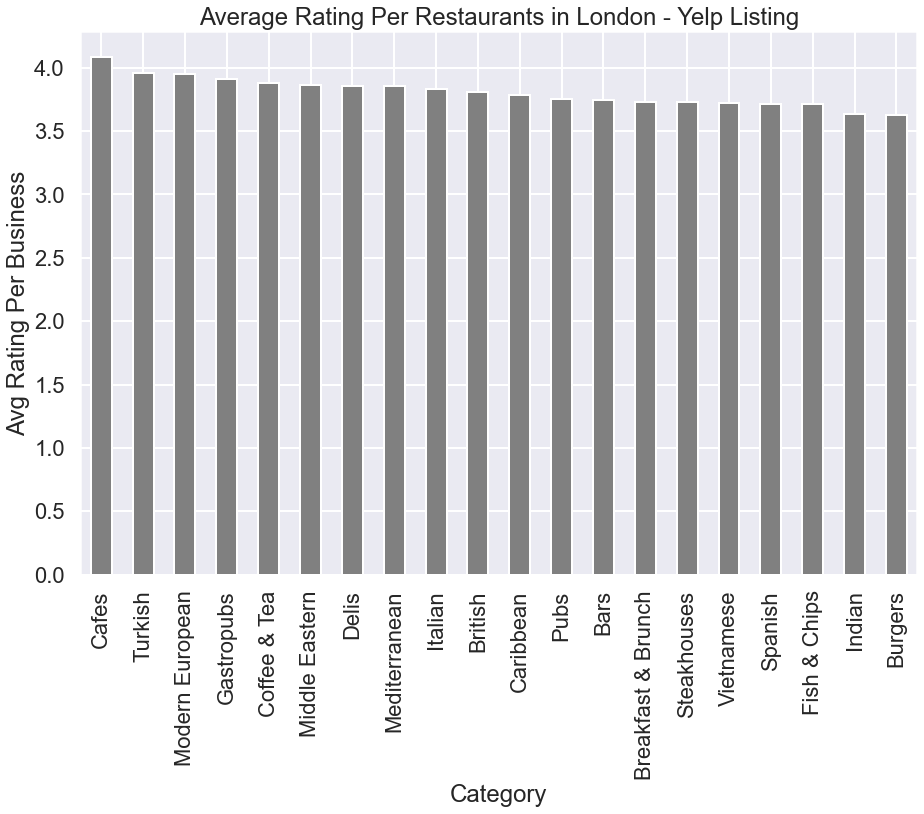

In [29]:
sns.set_context('poster')
sns.set_style('darkgrid')
RT1.Avg_Rating.plot(kind='bar',figsize=(15,10),color='grey')
plt.title('Average Rating Per Restaurants in London - Yelp Listing')
plt.xlabel('Category')
plt.ylabel('Avg Rating Per Business')

Only cafes have a rating of 4 stars across London. Chinese and American restaurant tend to have the worst rating.

In [30]:
data.groupby('Bus_Name ')['Review_count '].sum().sort_values(ascending=False)

Bus_Name 
Dishoom               3262
The Breakfast Club    1153
Nando's               1086
Wahaca                 955
Byron                  946
                      ... 
Perennial                1
Dallas Burger            1
Peppeckish               1
Dallas Pizza City        1
禾 Restaurant He          1
Name: Review_count , Length: 8433, dtype: int64

In [31]:
data[data['Bus_Name ']=='Dishoom']

,Business_ID,Bus_Name,Review_count,Rating,Category_Alias,Category_Title,Lat,Long,Price,Postcode
2434,mc1KLbA1Sy4kUTKo0ZEeRQ,Dishoom,542,4.5,indpak,Indian,51.513087,-0.139767,2,W1B 5QP
2435,oK_SLmmAVQg3meguh7LrIA,Dishoom,1842,4.5,indpak,Indian,51.512447,-0.126958,2,WC2H 9FB
2436,vlq4D26p_143Tj21OF-iMA,Dishoom,493,4.5,indpak,Indian,51.524531,-0.076594,2,E2 7JE
2437,R1UKQHTz65dQKkdLjzVEBg,Dishoom,385,4.5,indpak,Indian,51.536318,-0.125145,2,N1C 4AB


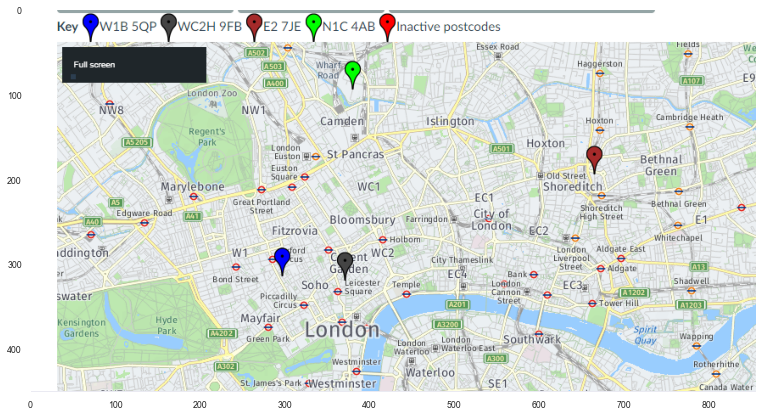

In [56]:
import matplotlib.image as mpimg
Dishoom=mpimg.imread('postcode.png', 0)
plt.figure(figsize=(13,13))
sns.set_style('dark')
plt.imshow(Dishoom)
plt.show()

Indian restaurant Dishoom has four different locations across London and they tend to get the most reviews. 

Also, Chain restaurants tends to get the most reviews compare to other restaurants this could be due to  their popularity.

# Rating Distribution 

Text(0.5,1,'Rating Distribution for Listing')

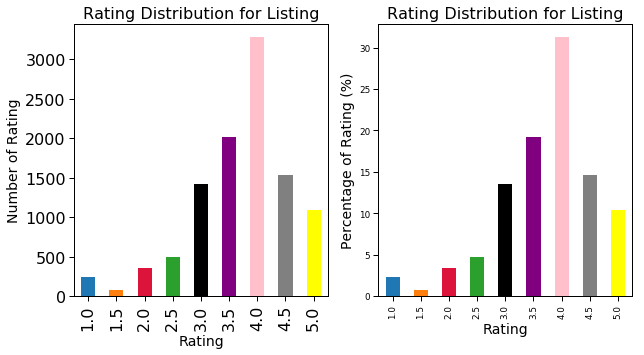

In [6]:
sns.set_context('paper')
dist = data.groupby('Rating ')['Category_Title '].count()
ax1 = plt.subplot(121)
ax1 = dist.plot(kind='bar',title='Rating Distrubition for Listing',figsize=(10,5),color=["C0", "C1","crimson","C2", "k",'purple','pink','grey','yellow'],fontsize=16)
ax2= plt.subplot(122)
ax2 = dist.div(dist.sum()).mul(100).plot(kind='bar',title='   Rating Distrubition for Listing',figsize=(10,5),color=["C0", "C1","crimson","C2", "k",'purple','pink','grey','yellow'])
ax1.set_ylabel('Number of Rating',fontsize=14)
ax2.set_ylabel('Percentage of Rating (%)',fontsize=14)
ax1.set_xlabel('Rating',fontsize=14)
ax2.set_xlabel('Rating',fontsize=14)
ax1.set_title('Rating Distribution for Listing',fontsize=16)
ax2.set_title('Rating Distribution for Listing',fontsize=16)

31% of the ratings are 4 stars and 90% of Rating is 3 stars or above, this shows customers tend to enjoy their experiences at these restaurants . 

# Prices Area

In [34]:
new_area = data[data['Long ']>-1]

Text(0.5, 1.0, 'Restaurants in London Boroughs')

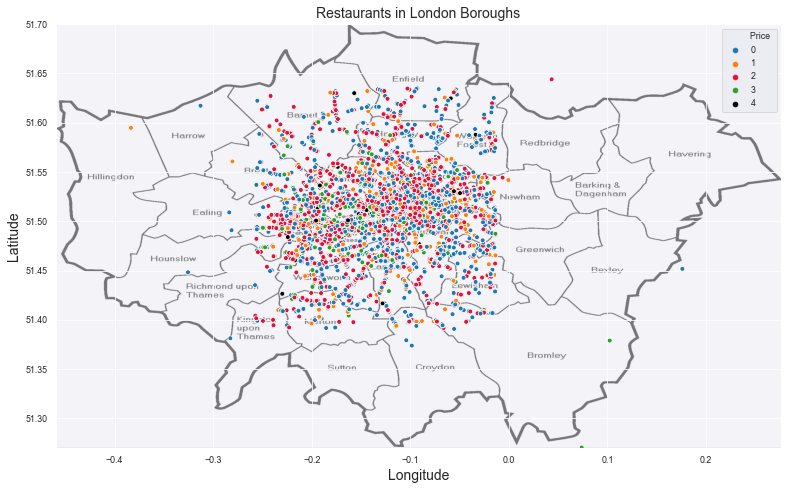

In [35]:
import matplotlib.image as mpimg
London_img=mpimg.imread('city.png', 0)
sns.set_context('paper')
plt.figure(figsize=(13,13))
ax =sns.scatterplot(new_area['Long '],new_area['Lat '], hue=new_area['Price '], legend="full",  palette=["C0", "C1","crimson","C2", "k"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs', fontsize=14)

In [36]:
x0 = new_area[new_area['Price ']==0]
x1 = new_area[new_area['Price ']==1]
x2 = new_area[new_area['Price ']==2]
x3 = new_area[new_area['Price ']==3]
x4 = new_area[new_area['Price ']==4]

In [37]:
x0.shape

(3686, 10)

Text(0.5, 1.0, 'Restaurants in London Boroughs - Price Area Unknown')

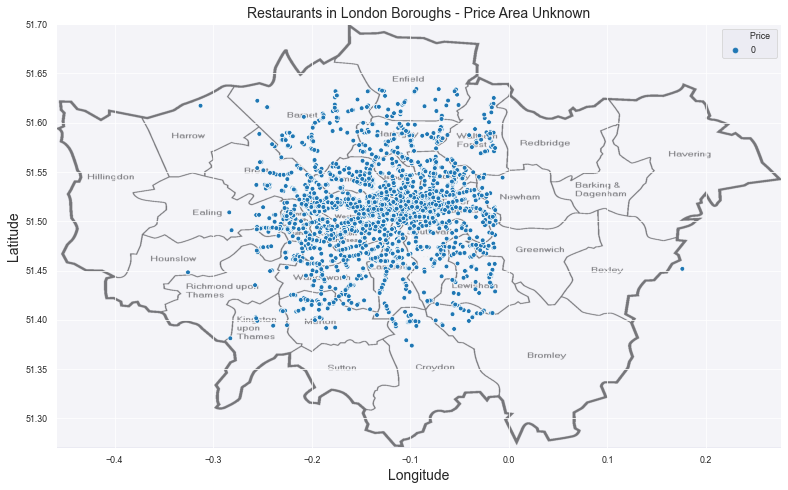

In [38]:
plt.figure(figsize=(13,13))
sns.set_context('paper')
ax =sns.scatterplot(x0['Long '],x0['Lat '], hue=x0['Price '], legend="full",  palette=["C0"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs - Price Area Unknown', fontsize=14)

Text(0.5, 1.0, 'Restaurants in London Boroughs- Price Area £')

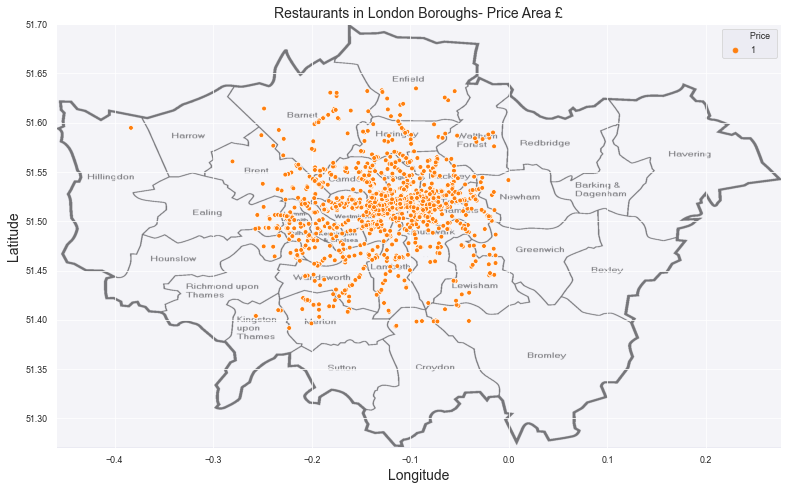

In [39]:
plt.figure(figsize=(13,13))
sns.set_context('paper')
ax =sns.scatterplot(x1['Long '],x1['Lat '], hue=x1['Price '], legend="full",  palette=["C1"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs- Price Area £', fontsize=14)

Text(0.5, 1.0, 'Restaurants in London Boroughs- Price Area ££')

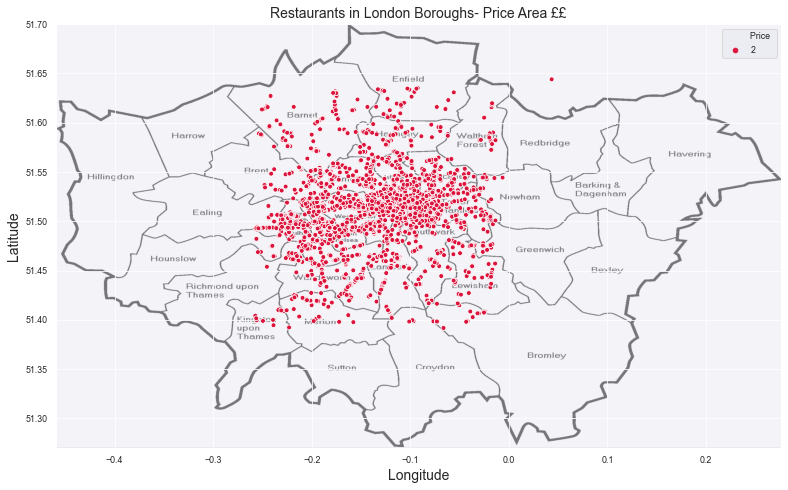

In [40]:
plt.figure(figsize=(13,13))
ax =sns.scatterplot(x2['Long '],x2['Lat '], hue=x2['Price '], legend="full",  palette=["crimson"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs- Price Area ££', fontsize=14)


Text(0.5, 1.0, 'Restaurants in London Boroughs - Price Area £££')

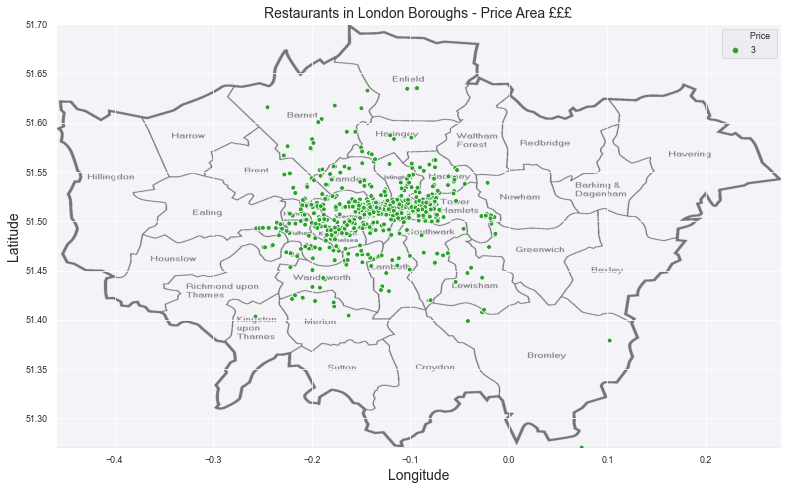

In [41]:
plt.figure(figsize=(13,13))
ax =sns.scatterplot(x3['Long '],x3['Lat '], hue=x3['Price '], legend="full",  palette=["C2"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs - Price Area £££', fontsize=14)

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\relational.py:950: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  points = ax.scatter(*args, **kws)


Text(0.5, 1.0, 'Restaurants in London Boroughs- Price Area ££££')

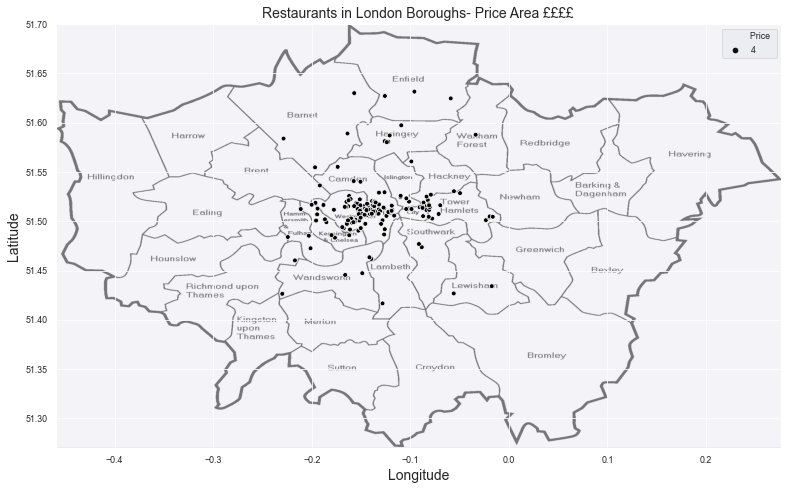

In [42]:
plt.figure(figsize=(13,13))
ax =sns.scatterplot(x4['Long '],x4['Lat '], hue=x4['Price '], legend="full",  palette=["K"])
ax.imshow(London_img,extent=[-0.46, 0.276045,51.270481, 51.7], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('scaled')
plt.title('Restaurants in London Boroughs- Price Area ££££', fontsize=14)

City,Westminster and Kensington & Chelsea has the most high end restaurants, which kind of make sense as MPs and high paying jobs can be found in these boroughs.

## Restaurants by Price Area

In [43]:
bus_price = pd.pivot_table(new_area,index='Category_Title ',columns='Price ',values='Rating ',aggfunc='count')
bus_price['Total'] = bus_price.sum(axis=1) 
bus_price = bus_price.reset_index()

In [44]:
Top10 = bus_price.sort_values('Total',ascending=False).nlargest(10,'Total')

In [45]:
Top10 = Top10.drop('Total',axis=1)
Top10 = Top10.set_index('Category_Title ')

Text(0, 0.5, 'Category of Restaurants')

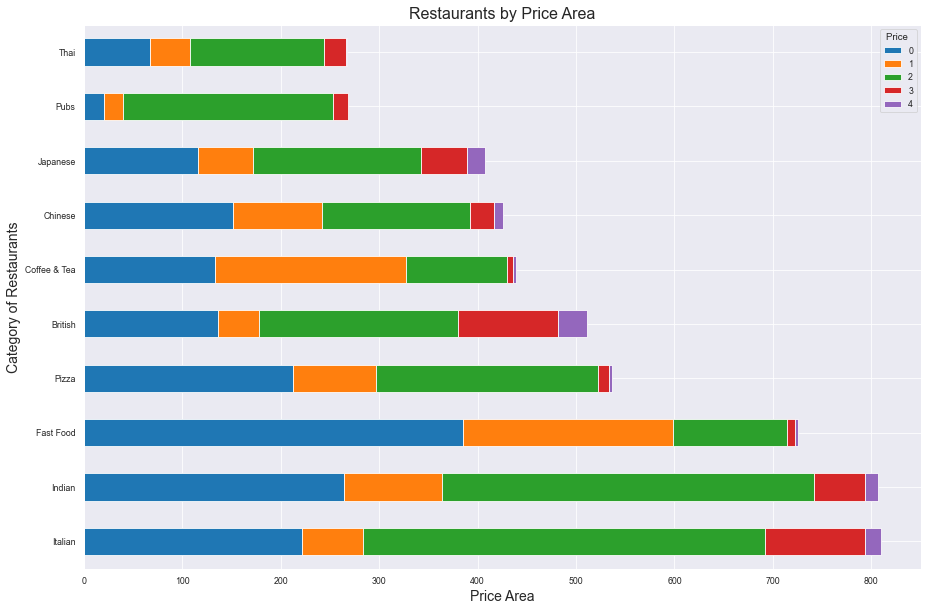

In [46]:
Top10.plot(kind='barh',stacked=True,figsize=(15,10))
plt.title('Restaurants by Price Area',fontsize=16)
plt.xlabel('Price Area',fontsize=14)
plt.ylabel('Category of Restaurants',fontsize=14)

In [47]:
bus_price = bus_price.reset_index()

In [48]:
bus_price.groupby(4)['Category_Title '].sum().tail(3)

4
16.0     Italian
18.0    Japanese
29.0     British
Name: Category_Title , dtype: object

In [49]:
bus_price.groupby(3)['Category_Title '].sum().tail(3)

3
47.0           Japanese
52.0             Indian
102.0    BritishItalian
Name: Category_Title , dtype: object

In [50]:
bus_price.groupby(2)['Category_Title '].sum().tail(3)

2
225.0      Pizza
378.0     Indian
409.0    Italian
Name: Category_Title , dtype: object

In [51]:
bus_price.groupby(1)['Category_Title '].sum().tail(3)

1
100.0          Indian
194.0    Coffee & Tea
214.0       Fast Food
Name: Category_Title , dtype: object

In [52]:
bus_price.groupby(0)['Category_Title '].sum().tail(3)

0
222.0      Italian
264.0       Indian
385.0    Fast Food
Name: Category_Title , dtype: object

- 15% of Restaurants in Price Area 4 are British followed by Japanese and Italian.

- 12% of Restaurants in Price Area 3 are British followed by Indian and Japanese.

- 10% of Restaurants in Price Area 2 are Italian followed by Indian and Pizza.

- 12% of Restaurants in Price Area 1 are Fast Food followed by Coffee & Tea and Indian.

- 10% of Restaurants in Price Area 0 are Fast Food followed by Indian and Italian.

We can clearly see a trends in the listing - Fast Food/Cafe/takeaways tend to be cheaper and whether has more traditional food like British and Japanese tend to be more expensive

# Reviews by Price Area

Text(0, 0.5, 'Avg Number of Reviews')

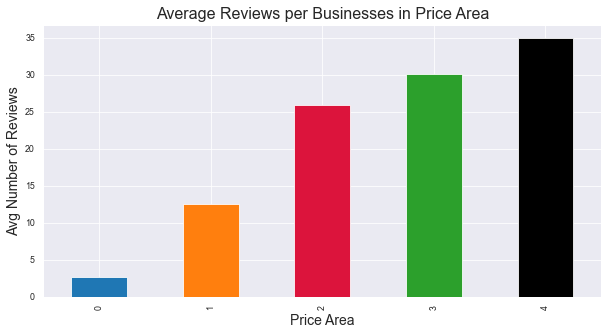

In [53]:
sns.set_style('darkgrid')
total_no_of_reviews_per_area = new_area.groupby('Price ')['Review_count '].mean().plot(kind='bar',title='Average Reviews per Businesses in Price Area',figsize=(10,5),color=["C0", "C1","crimson","C2", "k"])
plt.title('Average Reviews per Businesses in Price Area',fontsize=16)
plt.xlabel('Price Area',fontsize=14)
plt.ylabel('Avg Number of Reviews',fontsize=14)

By looking at the ratio of businesses to reviews in each of the price areas,it seems the most expensive restaurants tend to get more reviews on average.

# Rating by Price Area

Text(0, 0.5, 'Avg Rating')

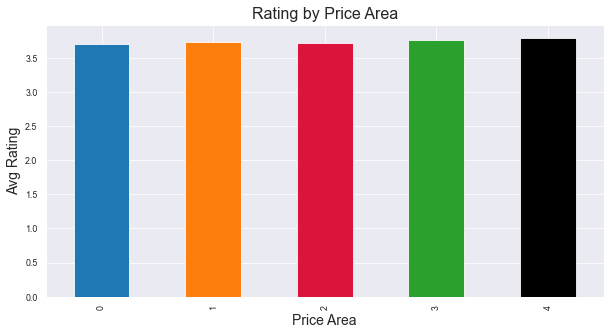

In [55]:

sns.set_style('darkgrid')
total_no_of_rating_per_area = new_area.groupby('Price ')['Rating '].mean().plot(kind='bar',figsize=(10,5),color=["C0", "C1","crimson","C2", "k"])
plt.title('Rating by Price Area',fontsize=16)
plt.xlabel('Price Area',fontsize=14)
plt.ylabel('Avg Rating',fontsize=14)

Do expensive restaurants receive better rating?

Expensive Restaurants does tend to get more reviews however when it comes to rating and compare across other price range restaurants, we cannot say with confidence that expensive restaurants receive better rating.